In [61]:
%matplotlib inline
import geopandas as gdp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Point, Polygon
import random
import numpy as np
import itertools
import sys

In [2]:
#load file 
map_file='./data/TM_WORLD_BORDERS-0.3.shp'

map_plot=gdp.read_file(map_file)

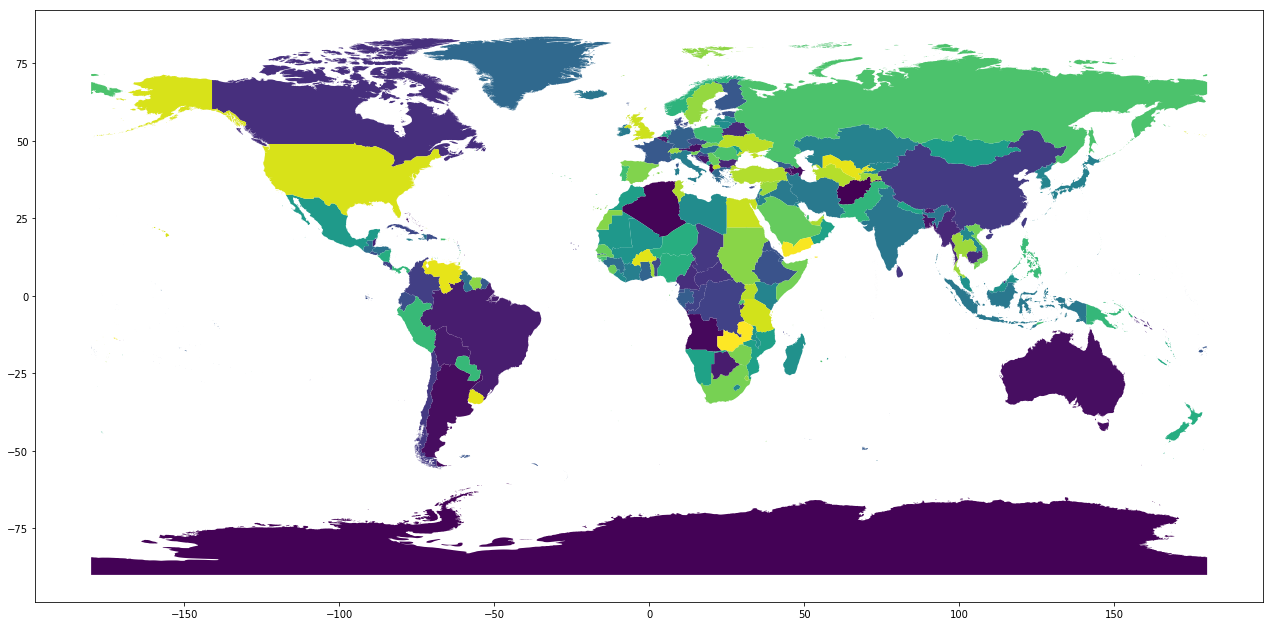

In [9]:
#initial displaying
map_plot.plot(figsize=(22, 22), column='UN')

In [4]:
#See format of data, borders are defined by geometry 
map_plot.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.802216, 2.981389 36.80693..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,(POLYGON ((45.08332100000001 39.76804400000015...
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.436214 41.021065, 19.450554 41.05..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,(POLYGON ((45.57305100000013 40.63248800000008...


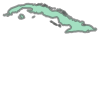

In [5]:
#idividual countries can be displayed, here we display Cuba 
map_plot.loc[40, 'geometry']

In [99]:
#Using Point, we can define coordinate points which are put in dataframe which can be interpreted and added on top of map
rado=[[random.randint(-180,180),random.randint(-90,90) ]for i in range(2)]

un_point=[Point(i) for i in rado]
geo_df=gdp.GeoDataFrame(geometry=un_point)

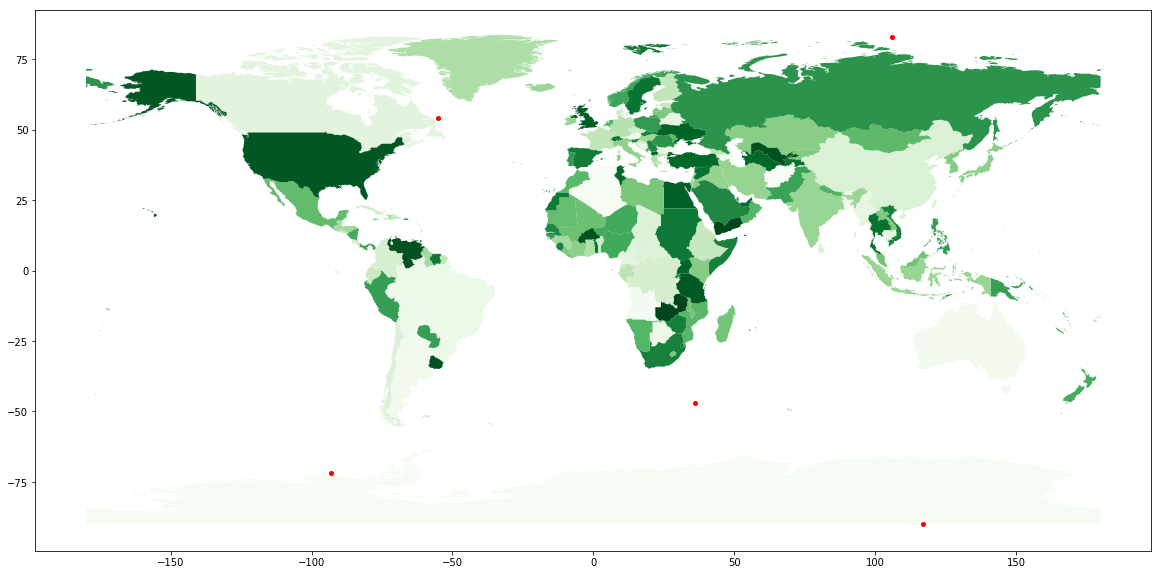

In [91]:
#When plotting here we can specify column to use in color representation and color palette (Greens, Reds, Blues etc...)
fig, ax = plt.subplots(1, figsize=(20, 20))
map_plot.plot(column='UN', cmap= 'Greens', linewidth=0.8, ax=ax)
#Here the points are added, color and size can be modified
geo_df.plot(ax=ax, markersize=16, color='red')

In [115]:
#Again, coordinates are given in this format 
rado=[[random.randint(-180,180),random.randint(-90,90) ]for i in range(20)]

[None]

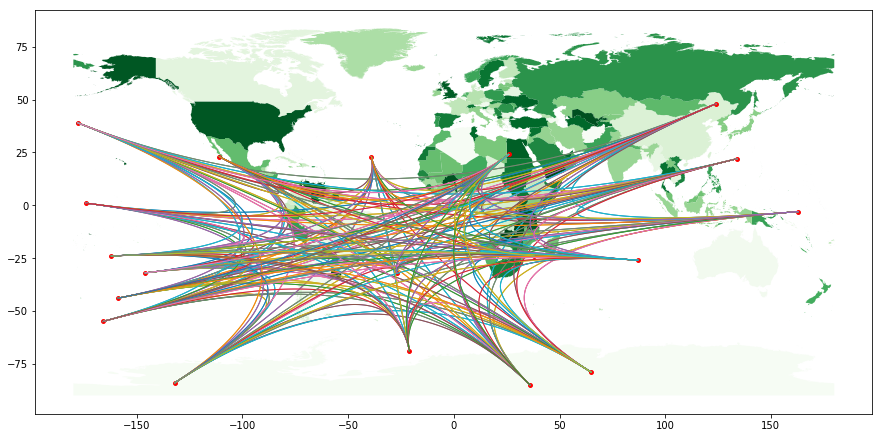

In [117]:
fig, ax = plt.subplots(figsize=(15,15))
#Plot wolrd  map first
map_plot.plot(column='UN', cmap= 'Greens', linewidth=0.8, ax=ax)

verts=np.array(rado)
# Plot the Bezier curves
numbers = [i for i in range(verts.shape[0])] # list containing points numbers 

bezier_path = np.arange(0, 1.01, 0.01) #jumps of 0.01 from 0 to 1

for a, b in itertools.product(numbers, repeat=2): #loop over pairs 
    if a == b:
        continue #not interested on curve between the point and itself

    x1y1 = x1, y1 = verts[a] #define points concerned
    x2y2 = x2, y2 = verts[b]

    xbyb = xb, yb =  [verts[:,0].mean(),verts[:,1].mean()]# third point of the bezier curve, now is the average of x and 

    # Compute and store the Bezier curve points
    x = (1 - bezier_path)** 2 * x1 + 2 * (1 - bezier_path) * bezier_path * xb + bezier_path** 2 * x2
    y = (1 - bezier_path)** 2 * y1 + 2 * (1 - bezier_path) * bezier_path * yb + bezier_path** 2 * y2
    
    ax.plot(x, y,linewidth=1) # interessting, line color and width can be defined on curve basis 

#Plot points     
x, y = verts.T
ax.scatter(x, y, marker='o', s=15, c='r')
ax.set(aspect=1)


Google Geocoding API could be used to obtain coordinates of populations of interest :
https://developers.google.com/maps/documentation/geocoding/intro